In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import graphviz


C:\Users\eera\AppData\Local\Temp\ipykernel_376\4003225885.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load dataset
df = pd.read_csv("heart.csv")

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Decision Tree Accuracy: 0.9853658536585366


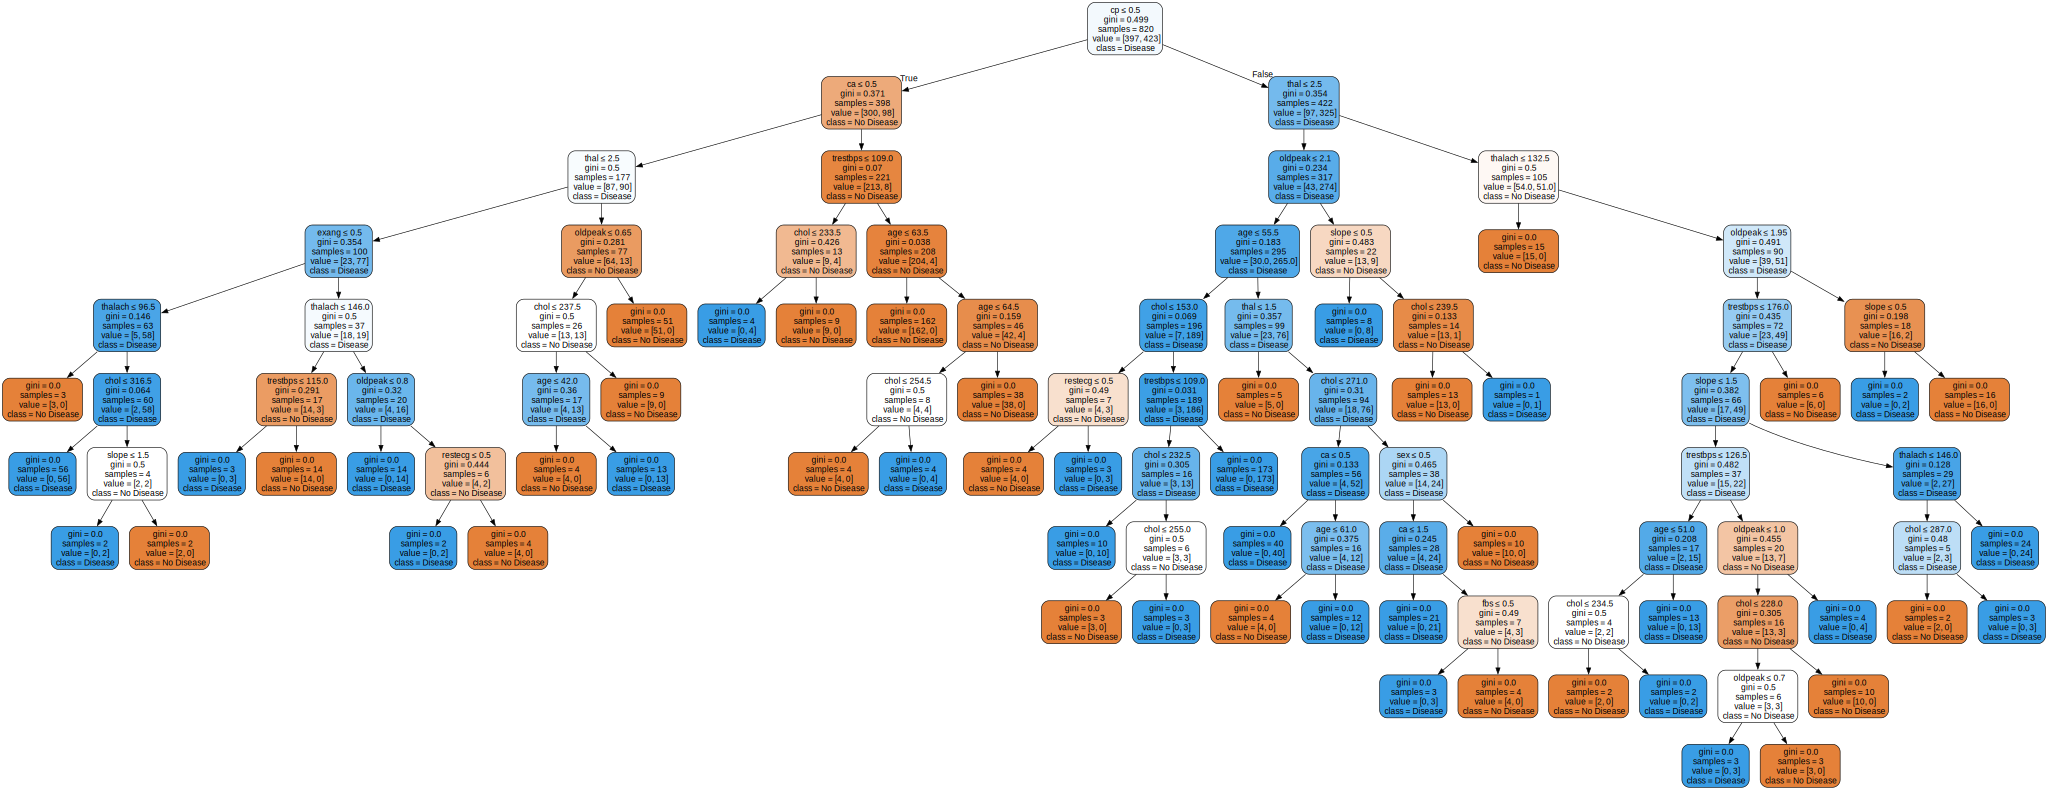

In [3]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Accuracy
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Visualize the tree
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X.columns,
                           class_names=["No Disease", "Disease"],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)
# graph.render("decision_tree")  # Saves as PDF


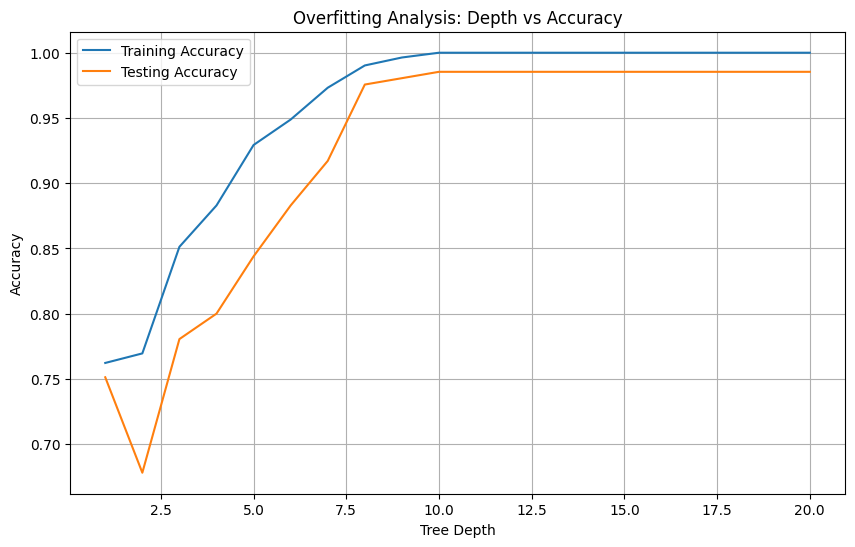

In [4]:
train_acc = []
test_acc = []
depths = range(1, 21)

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    train_acc.append(tree.score(X_train, y_train))
    test_acc.append(tree.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10,6))
plt.plot(depths, train_acc, label='Training Accuracy')
plt.plot(depths, test_acc, label='Testing Accuracy')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis: Depth vs Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Accuracy
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


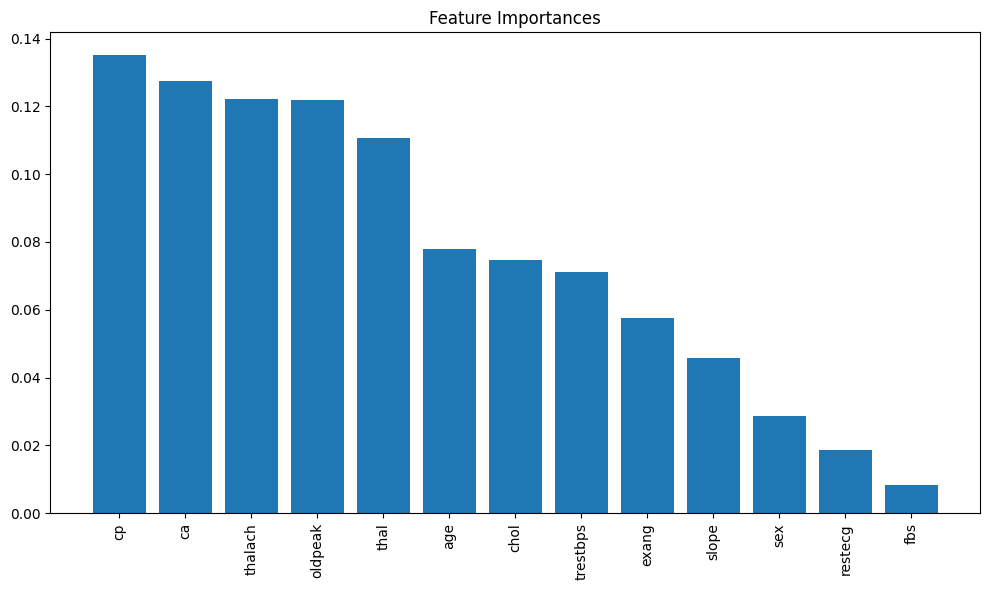

In [6]:
# Feature Importances from Random Forest
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()
